In [1]:
# Train a neural network for phoneme classification on TIMIT database
import sys
sys.path.append("../")
from utils.util import *

In [2]:
X_train, y_train, X_test, y_test = get_matrices()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers

input_dim = 195  # Number of features
num_classes = 58  # Number of classes

# Sample model for illustrative purposes
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim, )),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model, get the top 1 ~ 5 accuracy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[
                  tf.keras.metrics.SparseTopKCategoricalAccuracy(
                      k=i, name=f"top{i} accuracy") for i in range(1, 6)
              ])

# Training (using dummy data for illustration)
# X_train, Y_train, X_val, Y_val should be defined elsewhere in your code
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=10)


Epoch 1/10
5170/5170 [==============================] - 3s 635us/step - loss: 1.7164 - top1 accuracy: 0.4648 - top2 accuracy: 0.6563 - top3 accuracy: 0.7584 - top4 accuracy: 0.8197 - top5 accuracy: 0.8611 - val_loss: 1.5937 - val_top1 accuracy: 0.4896 - val_top2 accuracy: 0.6767 - val_top3 accuracy: 0.7829 - val_top4 accuracy: 0.8462 - val_top5 accuracy: 0.8887
Epoch 2/10
5170/5170 [==============================] - 3s 610us/step - loss: 1.4937 - top1 accuracy: 0.5218 - top2 accuracy: 0.7148 - top3 accuracy: 0.8107 - top4 accuracy: 0.8663 - top5 accuracy: 0.9021 - val_loss: 1.5234 - val_top1 accuracy: 0.5082 - val_top2 accuracy: 0.7001 - val_top3 accuracy: 0.8028 - val_top4 accuracy: 0.8626 - val_top5 accuracy: 0.9018
Epoch 3/10
5170/5170 [==============================] - 3s 609us/step - loss: 1.4304 - top1 accuracy: 0.5386 - top2 accuracy: 0.7309 - top3 accuracy: 0.8246 - top4 accuracy: 0.8779 - top5 accuracy: 0.9111 - val_loss: 1.4770 - val_top1 accuracy: 0.5182 - val_top2 accuracy:

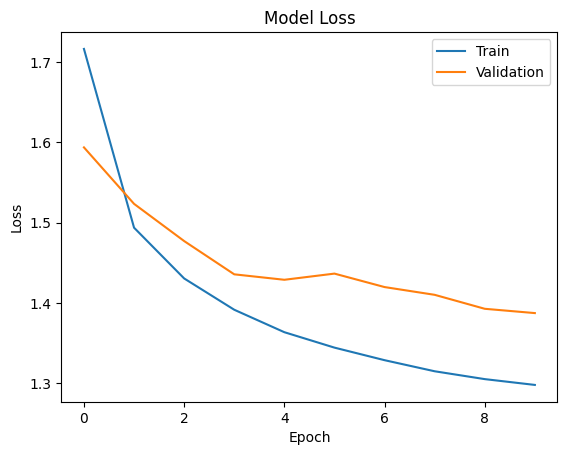

In [4]:
# Plot the loss and val_loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()